In [2]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import time                        # import time
from scipy.stats import pearsonr   # import pearson correlation


In [3]:
def default_pars( **kwargs):
    pars = {}
    
    ### typical neuron parameters###
    pars['V_th']    = -55. # spike threshold [mV]
    pars['V_reset'] = -75. #reset potential [mV]
    pars['tau_m']   = 10. # membrane time constant [ms]
    pars['g_L']     = 10. #leak conductance [nS]
    pars['V_init']  = -65. # initial potential [mV]
    pars['V_L']     = -75. #leak reversal potential [mV]
    pars['tref']    = 2. # refractory time (ms)

    ### simulation parameters ###
    pars['T'] = 400. # Total duration of simulation [ms]
    pars['dt'] = .1  # Simulation time step [ms]
    
    ### external parameters if any ###
    for k in kwargs:
        pars[k] = kwargs[k]
    
    pars['range_t'] = np.arange(0, pars['T'], pars['dt']) # Vector of discretized time points [ms]
        
    return pars

In [4]:
def run_LIF(pars, I):
    '''
    Simulate the LIF dynamics with external input current 
    
    Expects:
    pars       : parameter dictionary
    I          : input current [pA]. The injected current here can be a value or an array
    
    Returns:
    rec_spikes : spike times
    rec_v      : mebrane potential
    '''
    
    # Set parameters
    V_th, V_reset = pars['V_th'], pars['V_reset']   
    tau_m, g_L = pars['tau_m'], pars['g_L']        
    V_init, V_L = pars['V_init'], pars['V_L']       
    dt, range_t = pars['dt'], pars['range_t'] 
    Lt = range_t.size 
    tref = pars['tref']
    # Initialize voltage and current 
    v = np.zeros(Lt)
    v[0] = V_init
    I = I * np.ones(Lt) 
    tr = 0.
    # simulate the LIF dynamics 
    rec_spikes = []               # record spike times
    for it in range(Lt-1):
      if tr >0:
            v[it] = V_reset
            tr = tr-1
      elif v[it] >= V_th:         #reset voltage and record spike event
            rec_spikes.append(it)
            v[it] = V_reset
            tr = tref/dt
      #calculate the increment of the membrane potential
      dv = (-(v[it]-V_L) + I[it]/g_L) * (dt/tau_m)
        
      #update the membrane potential
      v[it+1] = v[it] + dv
        
    rec_spikes = np.array(rec_spikes) * dt
        
    return v, rec_spikes

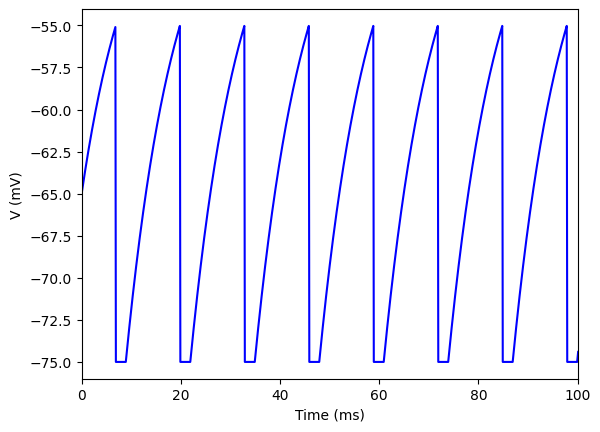

In [5]:
pars = default_pars()
v, rec_spikes = run_LIF(pars, I = 300.)
plt.plot(pars['range_t'], v, 'b')
plt.xlim(0, 100)
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');